# Pydy Tuesday 01-07-2025 - US Weekly Gas Prices data

### 1. Import Libraries

In [74]:
import sys
import pydytuesday
import pandas as pd
import numpy as np

# For Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# See version specifications of packages used (for reproducibility)
print("Python:", sys.version)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

### 2. Load data from the official tidytuesday repo

In [41]:
# Use date to fetch the files for that week
pydytuesday.get_date('2025-07-01')

Trying to fetch README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-07-01/readme.md
Successfully fetched README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-07-01/readme.md
Successfully saved meta.yaml to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_01072025\meta.yaml
Successfully saved regular_gasoline_prices.png to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_01072025\regular_gasoline_prices.png
Error downloading files: [Errno 13] Permission denied: 'weekly_gas_prices.csv'


In [42]:
# Load dataset using Pandas 
weekly_gas_prices = pd.read_csv('weekly_gas_prices.csv')

In [43]:
print(weekly_gas_prices.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22360 entries, 0 to 22359
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         22360 non-null  object 
 1   fuel         22360 non-null  object 
 2   grade        22360 non-null  object 
 3   formulation  19672 non-null  object 
 4   price        22360 non-null  float64
dtypes: float64(1), object(4)
memory usage: 873.6+ KB
None


In [44]:
# Set display width so that the details appear in a single line
pd.set_option('display.width', 1000)
# print("\n", weekly_gas_prices.describe())
print("\n Sample Records: \n", weekly_gas_prices.head())
print("\n", weekly_gas_prices.describe(include='all'))



 Sample Records: 
          date      fuel    grade   formulation  price
0  1990-08-20  gasoline  regular           all  1.191
1  1990-08-20  gasoline  regular  conventional  1.191
2  1990-08-27  gasoline  regular           all  1.245
3  1990-08-27  gasoline  regular  conventional  1.245
4  1990-09-03  gasoline  regular           all  1.242

               date      fuel  grade formulation         price
count        22360     22360  22360       19672  22360.000000
unique        1813         2      6           3           NaN
top     2008-02-11  gasoline    all         all           NaN
freq            15     19672   6506        6687           NaN
mean           NaN       NaN    NaN         NaN      2.582047
std            NaN       NaN    NaN         NaN      1.021566
min            NaN       NaN    NaN         NaN      0.885000
25%            NaN       NaN    NaN         NaN      1.575000
50%            NaN       NaN    NaN         NaN      2.646000
75%            NaN       NaN    Na

In [ ]:
# Convert to datetime format
weekly_gas_prices['date'] = pd.to_datetime(weekly_gas_prices['date'])
weekly_gas_prices['year'] = weekly_gas_prices['date'].dt.year


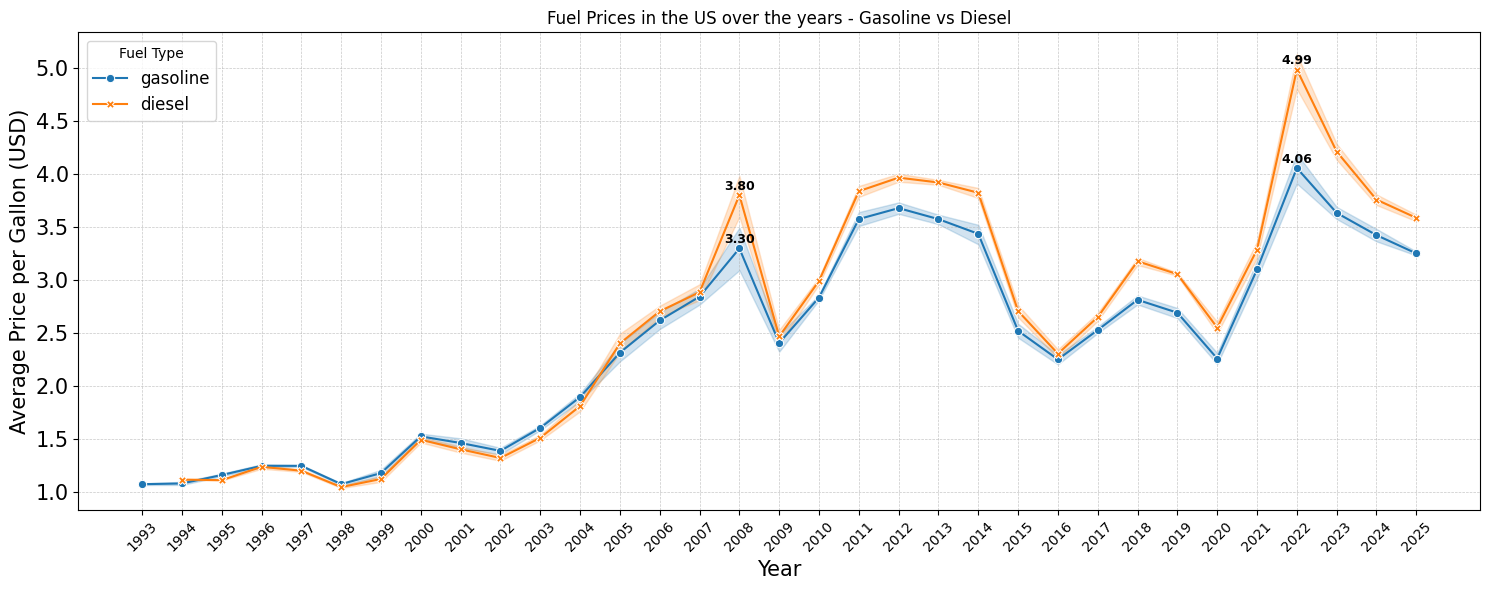

In [ ]:
gasoline_df_all = weekly_gas_prices[
    (weekly_gas_prices['fuel'] == 'gasoline') &
    (weekly_gas_prices['grade'] == 'all') &
    (weekly_gas_prices['formulation'] == 'all')
]

diesel_df_all = weekly_gas_prices[
    (weekly_gas_prices['fuel'] == 'diesel') &
    (weekly_gas_prices['grade'] == 'all')
]

combined = pd.concat([gasoline_df_all, diesel_df_all], ignore_index=True)

plt.figure(figsize=(15,6))
sns.lineplot(data=combined, x='year', y='price', hue='fuel', style='fuel', markers=True, dashes=False)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title("Fuel Prices in the US over the years - Gasoline vs Diesel")
plt.xlabel('Year', size=15)
years = sorted(combined['year'].unique())
plt.xticks(ticks=years, rotation=45, size=10)
yticks = np.arange(1.0, 5.1, 0.5)
plt.yticks(ticks=yticks, size=15)
plt.ylabel('Average Price per Gallon (USD)', size=15)
plt.legend(title='Fuel Type', loc='upper left', fontsize=12)

spike_years = [2008, 2022]

for fuel_type in combined['fuel'].unique():
    temp = combined[(combined['fuel'] == fuel_type)]
    yearly_avg = temp.groupby('year')['price'].mean().reset_index()

    for _, row in yearly_avg.iterrows():
        if row['year'] in spike_years:
            plt.text(row['year'], row['price'] + 0.05, 
                     f"{row['price']:.2f}",
                     color='black', fontsize=9, fontweight='bold',
                     ha='center')
plt.tight_layout()
plt.show()